In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [2]:
#data loading

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [8]:
def plot(i):
    plt.imshow(x_train[i] , cmap = 'binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

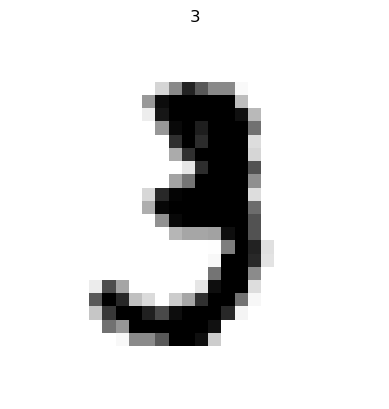

In [9]:
plot(10)

In [10]:
#preprocessing

In [11]:
#normalization
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [12]:
x_train.shape


(60000, 28, 28)

In [13]:
#reshape to (28,28,1) for input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [14]:
x_train.shape


(60000, 28, 28, 1)

In [16]:
#convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [19]:
#model building
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25)) #prevent overfitting

model.add(Dense(10, activation = 'softmax'))  #for classification

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [21]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [22]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta= 0.01, patience=4, verbose=1)

#ModelCheckPoint
mc = ModelCheckpoint('./bestmodel.h5', monitor='val_acc', verbose=1, save_best_only=True)

cb = [es,mc]

In [23]:
#Model Training

his = model.fit(x_train, y_train, epochs= 50, validation_split= 0.3)

Epoch 1/50
1313/1313 [==============================] - 16s 11ms/step - loss: 0.2220 - accuracy: 0.9311 - val_loss: 0.0840 - val_accuracy: 0.9741
Epoch 2/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0792 - accuracy: 0.9758 - val_loss: 0.0606 - val_accuracy: 0.9817
Epoch 3/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0533 - val_accuracy: 0.9836
Epoch 4/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0504 - val_accuracy: 0.9848
Epoch 5/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 6/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 7/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0395 -

In [28]:
#save model
model.save('bestmodel', save_format='h5')

#load model
model_S = keras.models.load_model('D://super ultimate pro//bestmodel')

In [29]:
score = model_S.evaluate(x_test, y_test)
print(f'Model Accuracy = {score[1]}')     #score[0] = loss, score[1] = accuracy


313/313 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9899
Model Accuracy = 0.9898999929428101
